<h1>Assignment 7</h1>

<p>
    Name: Alberto Lucas <br>
    Class: Cisprog-6<br>
    Assignment: 6 - Machine Learning <br>
    Date: 12/11/2021 <br>
    Description: Application - Exploring Hand-Written digits from Python Data Science Handbook
</p>
<hr>

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import seaborn as sns

<br>
<h4>Import image data</h4>

In [2]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

<br>
<h4>Visualizing the first hundred numbers in the data set</h4>

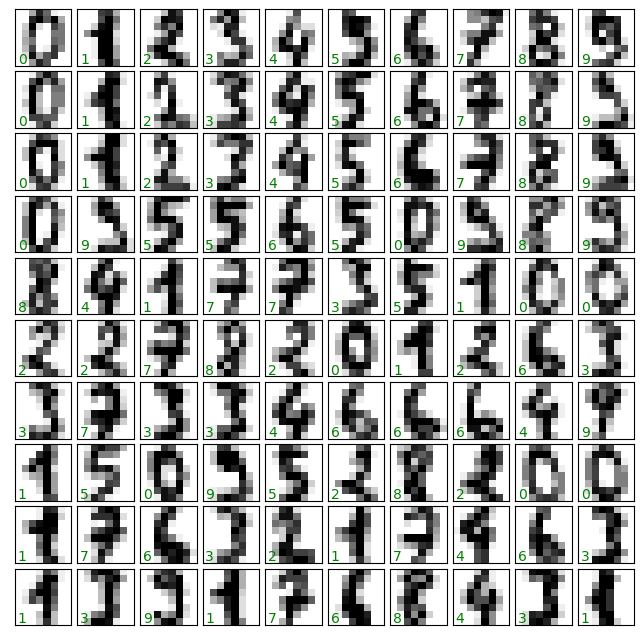

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    
plt.show()

<br>
<h4>Flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit.
</h4>

In [4]:
X = digits.data
X.shape

(1797, 64)

<br>
<h4>Store the previously determined label for each digit. </h4>

In [5]:
y = digits.target
y.shape

(1797,)

<br>
<h4>Using a manifold learning algorithm (Isomap) to transofm the data to two dimensions</h4>

In [6]:
%%capture

from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

In [7]:
data_projected.shape

(1797, 2)

<br>
<h4>Display a visualization showing how well various numbers are spearated in the 64-dimensional space.</h4>

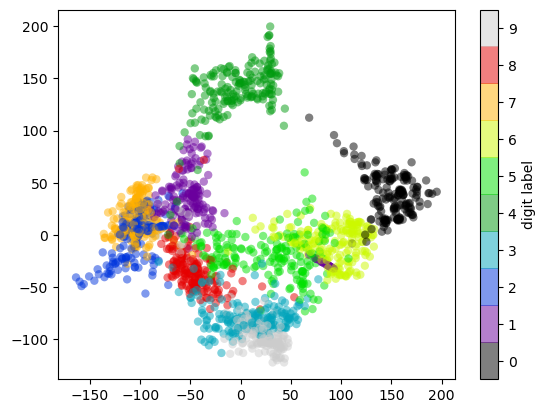

In [8]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);
plt.show()

<br>
<h4>Split the data into a training and testing set</h4>

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

<br>
<h4>Fit a Gaussian naive Bayes model</h4>

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

<br>
<h4>Gauge accuracy of model</h4>

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

<br>
<h4>Using confusion matrix to identify where mislabeled points tend to be</h4>

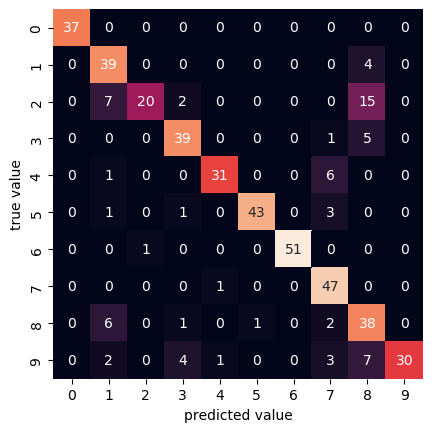

In [12]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');
plt.show()

<br>
<h4>Plot the inputs again, with their predicted labels. Green for correct labels, and red for incorrect labels.</h4>

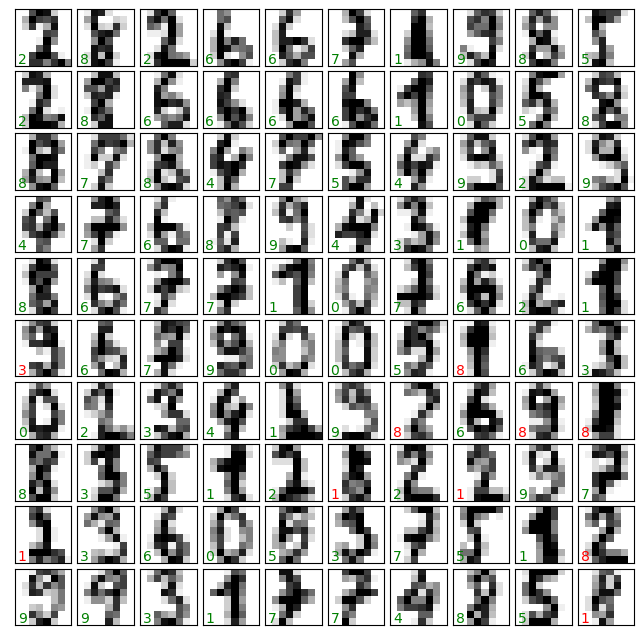

In [13]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

plt.show()